<a href="https://colab.research.google.com/github/bachu2005/MINOR_PROJECT/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pyspark
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Large Dataset Analysis") \
    .getOrCreate()

# Load a large dataset (assume it's in CSV format)
df = spark.read.csv("/task1.csv", header=True, inferSchema=True)

# Perform a transformation (e.g., group by a column and get averages)
df_grouped = df.groupBy("Calories (kcal)").avg("Water_Intake (ml)")

# Show result
df_grouped.show()
# Initialize Spark session
spark = SparkSession.builder \
    .appName("Large Dataset Analysis") \
    .getOrCreate()

# Load a large dataset (assume it's in CSV format)
df = spark.read.csv("/task1.csv", header=True, inferSchema=True)

# Perform a transformation (e.g., group by a column and get averages)
df_grouped = df.groupBy("Calories (kcal)").avg("Water_Intake (ml)")

# Show result
df_grouped.show()


+---------------+----------------------+
|Calories (kcal)|avg(Water_Intake (ml))|
+---------------+----------------------+
|            496|     632.1052631578947|
|            148|               584.375|
|            463|     482.6818181818182|
|            471|     614.4166666666666|
|            392|                512.05|
|            243|                 529.3|
|            540|      580.578947368421|
|            516|                592.68|
|            580|    458.94444444444446|
|            251|                 487.2|
|            137|     513.5769230769231|
|            451|                 637.0|
|             85|                461.75|
|            458|     535.7647058823529|
|             65|                 440.0|
|            481|     527.1578947368421|
|            588|    424.70588235294116|
|            255|     518.8076923076923|
|             53|                544.35|
|            296|     584.7826086956521|
+---------------+----------------------+
only showing top

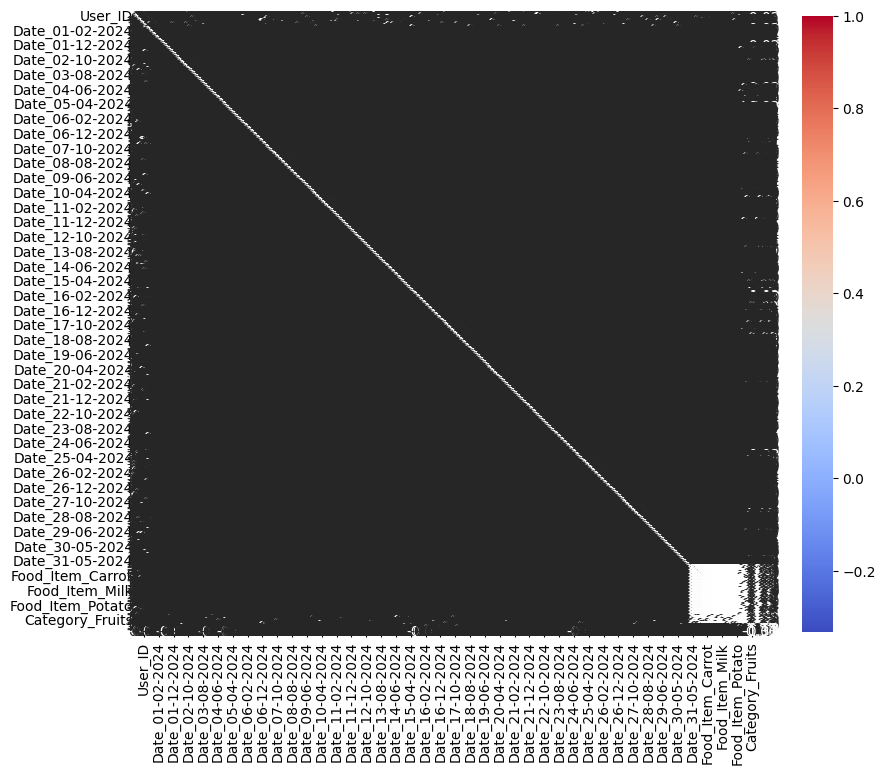

Selected Features: Index(['Date_08-12-2024', 'Date_25-03-2024', 'Date_26-02-2024'], dtype='object')
Mean Absolute Error: 0.8716412629014063
Mean Squared Error: 1.0024593131345638
R² Score: 0.0016378508576226913


In [10]:
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/task1.csv')

# Display the first few rows of the dataset
df.head()
# Check for missing values in the dataset
df.isnull().sum()

# Encode categorical variables (if applicable)
df = pd.get_dummies(df, drop_first=True)

# Feature scaling (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
# Apply scaling to the necessary columns (e.g., 'column_name')
df_scaled['Calories (kcal)'] = scaler.fit_transform(df[['Calories (kcal)']])
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the model (or use a classifier for classification tasks)
model = LinearRegression()

# Perform RFE to select the top features
selector = RFE(model, n_features_to_select=3)
selector = selector.fit(df_scaled.drop('Calories (kcal)', axis=1), df_scaled['Calories (kcal)'])

# Get the selected features
selected_features = df_scaled.drop('Calories (kcal)', axis=1).columns[selector.support_]
print(f"Selected Features: {selected_features}")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define your features (X) and target (y)
X = df_scaled[selected_features]  # Replace with the selected features
y = df_scaled['Calories (kcal)']  # Replace with your target column name

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (use a classifier like LogisticRegression for classification tasks)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")




